In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [9]:
# load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [11]:
path = './images/N207.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [12]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 423
Width of the image = 541


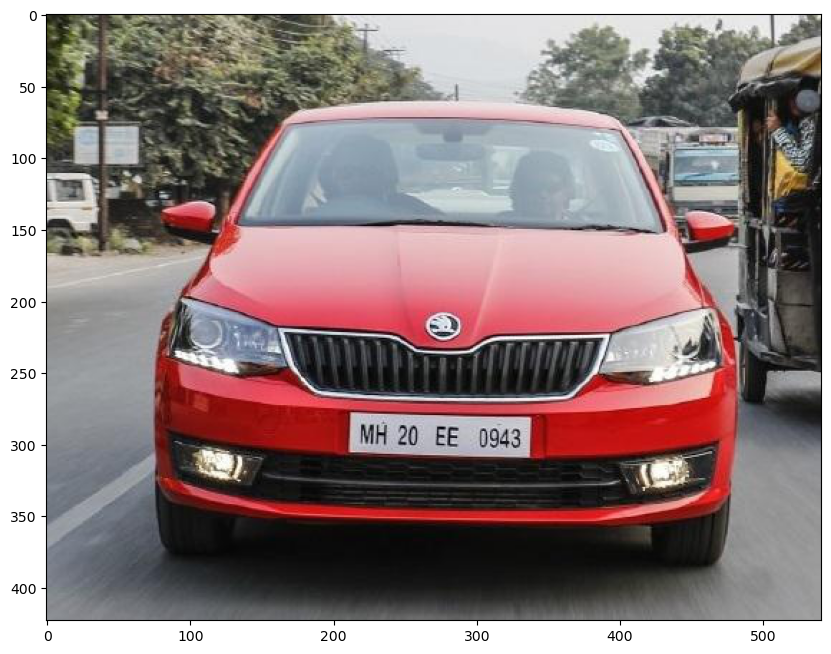

In [13]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [14]:
image_arr_224.shape

(224, 224, 3)

In [15]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [16]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 4s 4s/step


array([[0.40387732, 0.6220703 , 0.67173207, 0.7357513 ]], dtype=float32)

In [17]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[218.49762899, 336.54003906, 284.14266479, 311.22278774]])

In [18]:
coords = coords.astype(np.int32)
coords

array([[218, 336, 284, 311]])

(218, 284) (336, 311)


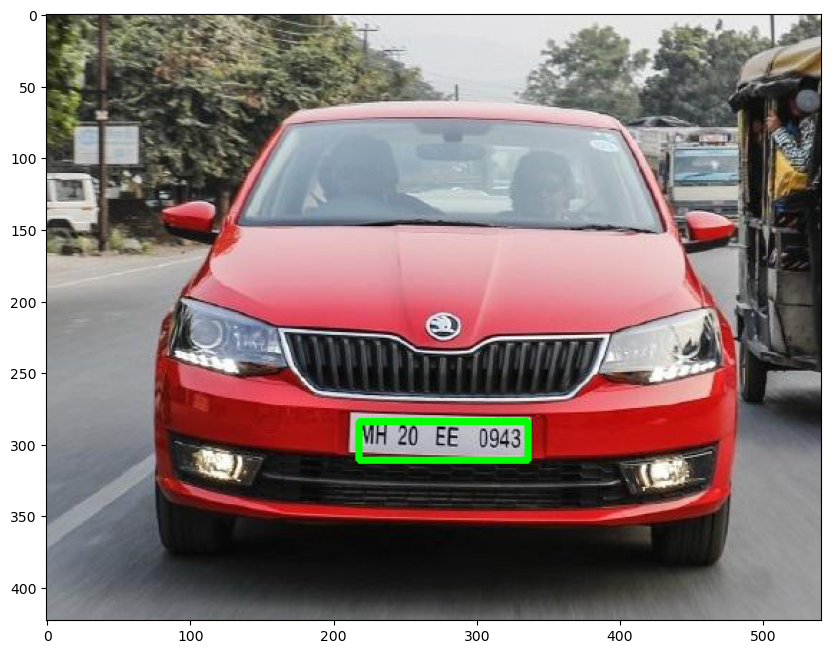

In [19]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [20]:
# create pipeline
path = './test_images/N207.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 0s 168ms/step
(440, 546) (608, 588)


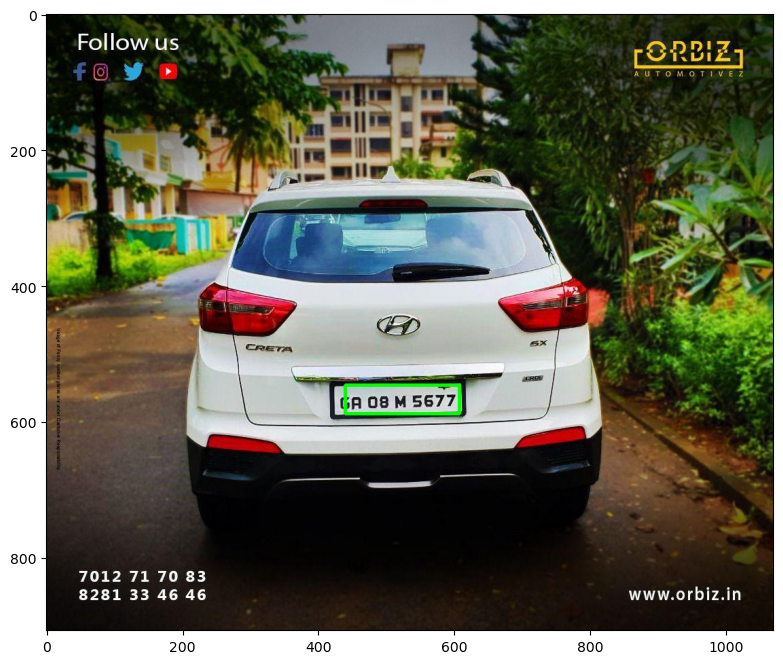

In [22]:
path = './images/N147.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [23]:
import pytesseract as pt

1/1 [==============================] - 0s 177ms/step
(218, 284) (336, 311)


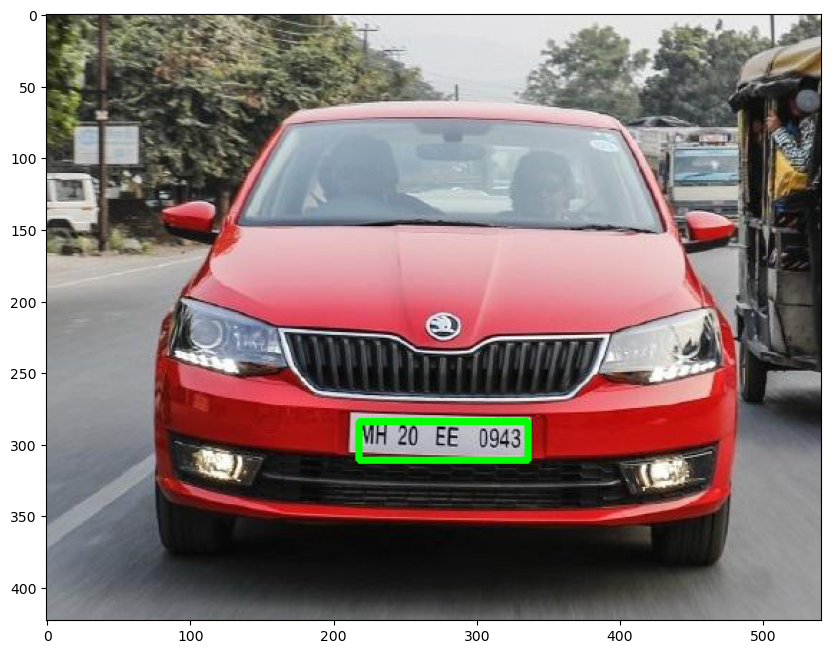

In [25]:
path = './images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [32]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

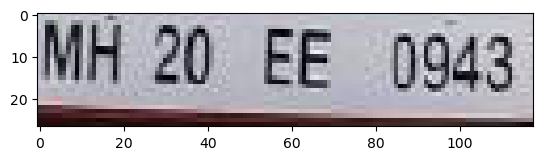

In [33]:
plt.imshow(roi)
plt.show()

In [34]:
!pip install tesseract

Defaulting to user installation because normal site-packages is not writeable


In [40]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.